# Build Network

To run a simulation will `BrainPy`, users will need two fundamental classes `brainpy.NeuGroup` and `brainpy.SynConn`, which refers to groups of neurons and synapses, respectively. With these two classes, users can build a neural network using class `brainpy.Network`, and simulate the whole network as an ensemble. 

In [build neurons](https://brainpy.readthedocs.io/en/latest/tutorials/build_neurons.html) and [build synapses](https://brainpy.readthedocs.io/en/latest/tutorials/build_synapses.html), we have already introduced how to define `brainpy.NeuType` and `brainpy.SynType`, respectively. To undertake the former sections, in this section we will first introduce `brainpy.NeuGroup` and `brainpy.SynConn`, then transition to the contruction and simulation of neural networks with `brainpy.Network`.

In [1]:
import brainpy as bp
import numpy as np
import matplotlib.pyplot as plt

-----------------------------------------

## brainpy.NeuGroup

Users implement a group of neurons as an object of `NeuGroup` class. Five input parameters are given to the class contructor to describe the neuron group:

- `model`: The neuron models used to generate the neuron group.
- `geometry`: Geometry of the neuron group. Can be a int or a two-tuple of int.
- `pars_update`: Parameters to update. (??? is this clear?)
- `monitors`: List of ST members to monitor. 
- `name`: Name of neuron group. Will be automatically assigned if not given.

Example code:

    neu_group_1 = bp.NeuGroup(model=LIF_neuron, geometry=(10, ), monitors=['V'])

Parameter `geometry` represents the geometry of the neuron group users build. As `BrainPy` supports one-dimensional and two-dimensional neuron structure, `geometry` should be a int or a (int, int) tuple.

Parameter `monitors` includes the ST members that will be recorded during simulation. If a ST member is listed in `monitors`, its time series will be saved in variable `<NEU_GROUP_NAME>.mon.<MEM_NAME>` for later use.

Example code:

    V_time_series = neu.mon.V[START_TIME:END_TIME, NEURON_NO]

Users can schedule the order to run subfunctions in the neuron groups with member function `runner.set_schedule`.

Example code:

    neu.runner.set_schedule(['input', 'update', 'monitor', 'reset'])

Users can set parameters and initialize ST members after building neuron group. BrainPy also support heterogeneous parameter assignment: users can assign different values to the same ST member or parameter of different neurons in a neuron group.

Example code:
    
    neu_group_1.pars['V_rest'] = np.random.randint(0, 2, size=(10,))
    
    neu_group_1.ST['V'] = -65.

----------------------------------------------

## brainpy.SynConn

Users implement a group of synapses as an object of `SynConn` class. Nine input parameters are given to the class contructor to describe the synapse connections:

- `model`: The neuron models used to generate the neuron group.
- `pars_update`: Parameters to update. (??? is this clear?)
- `pre_group`: Pre-synaptic neuron group.
- `post_group`: Post-synaptic neuron group.
- `conn`: Connection method to create synaptic connectivity.
- `num`: Number of synapses.
- `delay`: Time of synaptic delay.
- `monitors`: List of ST members to monitor. 
- `name`: Name of neuron group. Will be automatically assigned if not given.

`BrainPy` implements two ways to define a set of synapse connection:

-- 1. Give value to the parameters `pre_group`, `post_group` and `conn`, and leave the parameter `num` blank. In this case, `pre_group` and `post_group` are two objects of `NeuGroup` class, and parameter `conn` specifies the connection strategy `BrainPy` will use to build synapses.

Eample code:

    gabaa = bp.SynConn(model=GABAa_syn, pre_group=pre, post_group=post, 
                       conn=bp.connect.All2All(), monitors=['s'], delay=10.)

-- 2. Give value to the parameter `num`, leave the parameters `pre_group`, `post_group` and `conn` blank. After `SynConn` object has been defined, users should assign value to four members of `SynConn`: `pre`, `post`, `pre2syn` and `post2syn`. In this case, `num` refers to the number of synapses, `pre` and `post` choose which neurons are to be connected, `pre2syn` and `post2syn` map the synapse and the pre-synaptic, post-synaptic neurons.

Example code:

    syn = bp.SynConn(model = syn_model, num = delta_t_num, 
                      monitors = ['w'], delay = 10.)
    syn.pre = bp.types.NeuState(['spike'])(2)
    syn.post = bp.types.NeuState(['V', 'input', 'spike'])(2)
    pre2syn_list = [[1, 1], [2, 2]]
    post2syn_list = [[1, 1], [2, 2]]
    syn.pre2syn = syn.requires['pre2syn'].make_copy(pre2syn_list)
    syn.post2syn = syn.requires['post2syn'].make_copy(post2syn_list)

Parameter `delay` refers to the synapse delay time. According to the biological nature of synapses, there is a time delay between the moment pre-synaptic spike affects the synapse state and the moment synapse state affects the post-synaptic spike. `BrainPy` realizes this delay with decorator `@brainpy.delayed`, and it will be automatically computed with proper defination of `NeuType` (See [build synapses](https://brainpy.readthedocs.io/en/latest/tutorials/build_synapses.html) for detail).

Parameter `monitors` includes the ST members that will be recorded during simulation. If a ST member is listed in `monitors`, its time series will be saved in variable `<NEU_GROUP_NAME>.mon.<MEM_NAME>` for later use.

Example code:

    w_time_series = syn.mon.w[START_TIME:END_TIME, NEURON_NO]

Users can schedule the order to run subfunctions in the synapse connections with member function `runner.set_schedule`.

Example code:

    syn.runner.set_schedule(['input', 'update', 'output', 'monitor'])

Users can set parameters and initialize ST members after building synapse connections. BrainPy also support heterogeneous parameter assignment: users can assign different values to the same ST member or parameter of different synapses in a synapse connection.

Example code:
    
    syn_conn_1.pars['w'] = np.random.rand(syn_num)

-------------------

## brainpy.Network

To initialize a neural network, i.e. an object of `brainpy.Network` class, a list of `NeuGroup` and `SynConn` objects should be provided to the `Network` constructor as input parameters.

- `*args`: List of objects in the network.
- `mode`: Number of simulation loop. (??? check if this description is right)
- `**kwargs`: List of object names' in the network. If this parameter is not provided, the object will be automatically named.

These objects can be accessed via their names, e.g. `NET_NAME.OBJ_NAME`.

Example code:

    net = bp.Network(neu_group_1, neu_group_2, syn_conn_1, syn_conn_2)

### add

Users can add objects to the network using member function `add` of class `Network` after initialization is done. Input parameters of function `add` is similar to the ones of initial function.

- `*args`: List of objects add to the network.
- `**kwargs`: List of object names' in the network. If this parameter is not provided, the object will be automatically named.

### run

`BrainPy` run simulation with member function `run` of class `Network`.

- `duration` : The amount of simulation time (ms) to run for.
- `inputs` : List of external inputs, each element is a quadruple of (receiver, item, external input, [operation]), operation is set to '+' by default if not given. Default = ().
- `report` : Report the progress of the simulation. Default = false.
- `report_percent` : The interval of simulation progress reporting. Default = 0.1.

The items of `inputs` quadruple:

- `receiver`: The `NeuGroup` or `SynConn` object that receives this input.
- `item`: Specific item of the receiver that receives the input.
- `external input`: Description of the input time series.
- `operation`: Which operation should the item take when it receives the input.

`BrainPy` supports diverse input methods. The `operation` item can be set as one of { + , - , * , / , = }, and if users do not provide this item explictly, it will be set to '+' by default. The value of `operation` defines in which way the input will be given to the receive item. Generally, users can see it as a binary operator. For example, if `operation == '+'`, then in a single update, the value of receive item `val = val + input`.

Example code:

    net.run(duration=100., inputs=[(neu_group_1, 'ST.input', 1.)], report=True)

After calling `run` function, `NeuGroup` and `SynConn` objects in the network will be updated in the way they were defined in their description, and in the order they were given to the `Network` constructor as input parameters. We should mention that this order barely affects the simulation result, because the update interval `dt` are relatively small, therefore single update will not cause a sharp change in variable values.

Note:

> i. Users can directly run `NeuGroup` with member function `NeuGroup.run`. However, `SynConn` can not be run in this way. See more details in [build neurons](https://brainpy.readthedocs.io/en/latest/tutorials/build_neurons.html) and [build synapses](https://brainpy.readthedocs.io/en/latest/tutorials/build_synapses.html).

> ii. Although the calculation order barely affects the simulation progress, the network inputs given in `run` function are not assigned to the receive items at the beginning of simulation epoch, instead they are assigned just before updating the receiver(??? 这个表述看得懂吗？). Therefore, users should be aware of the order and deal with the assignment carefully, otherwise this feature may cause a bug.

---------------------------------------------------------------------

## E/I balance network

We take E/I balance network as an example. E/I balance network is a canonical network model, in which the populations of excitatory and inhibitory neurons achieve an approximate balance and generate relative spiking patterns.

In [2]:
# set global parameters
bp.profile.set(jit=True, device='cpu',
               numerical_method='exponential')

num_exc = 500
num_inh = 500
prob = 0.1

Neuron model is defined as:

$$ \tau \frac{d V}{d t} = -(V - V_{rest} + I^{ext} + I^{net}(t))$$

In [3]:
# define neuron model as bp.NeuType
tau = 10.
V_rest = -52.
V_reset = -60.
V_threshld = -50.


@bp.integrate
def int_f(V, t, Isyn):
    return (-V + V_rest + Isyn) / tau


def update(ST, _t):
    V = int_f(ST['V'], _t, ST['inp'])
    if V >= V_threshld:
        ST['sp'] = 1.
        V = V_reset
    else:
        ST['sp'] = 0.
    ST['V'] = V
    ST['inp'] = 0.


neu = bp.NeuType(name='LIF',
                 ST=bp.types.NeuState({'V': 0, 'sp': 0., 'inp': 0.}),
                 steps=update,
                 mode='scalar')

Synapse model is defined as:

\begin{equation}
\label{eq6}
f(t) =\left\{
\begin{aligned}
exp(-\frac{t}{\tau_s}) & , & t \geq 0 , \\
0 & , & t < 0.
\end{aligned}
\right.
\end{equation}

$$ I^{net}(t) = J_E \sum_{j=1}^{p N_E}\sum_{t_j^\alpha < t}f(t - t_j^\alpha) - J_I \sum_{j=1}^{pN_I}\sum_{t_j^\alpha < t}f(t - t_j^\alpha)$$

In [4]:
# define synapse model as bp.SynType
tau_decay = 2.
JE = 1 / np.sqrt(prob * num_exc)
JI = 1 / np.sqrt(prob * num_inh)

@bp.integrate
def ints(s, t):
    return - s / tau_decay


def update(ST, _t, pre):
    s = ints(ST['s'], _t)
    s += pre['sp']
    ST['s'] = s
    ST['g'] = ST['w'] * s


def output(ST, post):
    post['inp'] += ST['g']


syn = bp.SynType(name='alpha_synapse',
                 ST=bp.types.SynState(['s', 'g', 'w']),
                 steps=(update, output),
                 mode='scalar')

Then we generate the concrete neuron group and synapse connections with the previously defined prototypes. Note that we give heterogeneous initial values to ST members. `BrainPy` also supports slice operation: as all the neurons use the same model, we include them in one neuron group and differentiate them with the type of synapse that connects them.

In [5]:
# generate bp.NeuGroup & bp.SynConn
group = bp.NeuGroup(neu,
                    geometry=num_exc + num_inh,
                    monitors=['sp'])
group.ST['V'] = np.random.random(num_exc + num_inh) * (V_threshld - V_rest) + V_rest

exc_conn = bp.SynConn(syn,
                      pre_group=group[:num_exc],
                      post_group=group,
                      conn=bp.connect.FixedProb(prob=prob))
exc_conn.ST['w'] = JE

inh_conn = bp.SynConn(syn,
                      pre_group=group[num_exc:],
                      post_group=group,
                      conn=bp.connect.FixedProb(prob=prob))
inh_conn.ST['w'] = -JI

Now we have neurons and synapses we need to build E/I balanced network. To integrate them into a network, we initialize an object of `brainpy.Network` class with those neurons and synapses, then run the network with member function `run`. In this progress, we simulate for 500 ms, give all the neurons in neuron group a constant input of amplitude `3.`, and report the simulation progress.

In [6]:
net = bp.Network(group, exc_conn, inh_conn)
net.run(duration=500., inputs=[(group, 'ST.inp', 3.)], report=True)

Compilation used 0.8340 s.
Start running ...
Run 10.0% used 0.109 s.
Run 20.0% used 0.241 s.
Run 30.0% used 0.356 s.
Run 40.0% used 0.480 s.
Run 50.0% used 0.592 s.
Run 60.0% used 0.709 s.
Run 70.0% used 0.820 s.
Run 80.0% used 0.953 s.
Run 90.0% used 1.085 s.
Run 100.0% used 1.223 s.
Simulation is done in 1.223 s.


After visualization, users can see the typical oscillation pattern of E/I balance network.

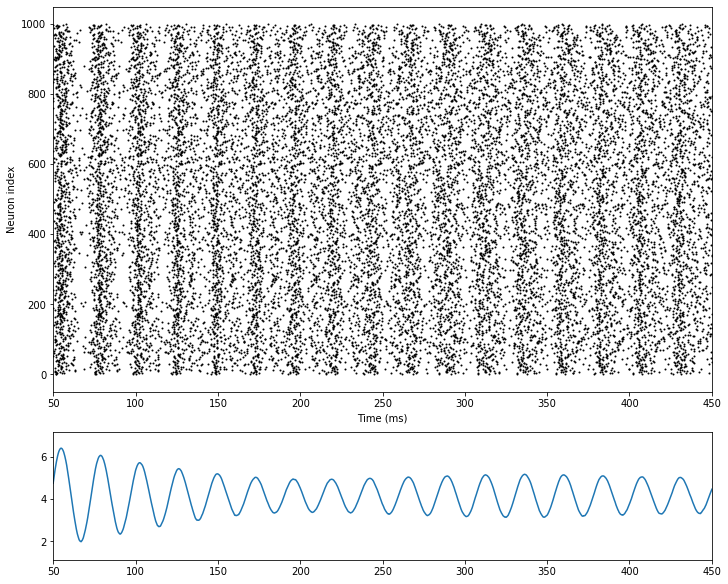

In [7]:
fig, gs = bp.visualize.get_figure(4, 1, 2, 10)

fig.add_subplot(gs[:3, 0])
bp.visualize.raster_plot(net.ts, group.mon.sp, xlim=(50, 450))

fig.add_subplot(gs[3, 0])
rates = bp.measure.firing_rate(group.mon.sp, 5.)
plt.plot(net.ts, rates)
plt.xlim(50, 450)
plt.show()